# 概率的两种含义

## 概述

本讲座说明了**概率分布**的两种不同解释

* 频率主义解释：预期在大规模独立同分布样本中出现的**相对频率**

* 贝叶斯解释：在观察一系列数据后对参数或参数列表的**个人观点**

我们建议观看这个关于频率主义方法中**假设检验**的视频

```{youtube} 8JIe_cz6qGA
```

观看完该视频后，请观看以下关于贝叶斯方法构建**覆盖区间**的视频

```{youtube} Pahyv9i_X2k
```

在您熟悉这些视频中的内容后，本讲座将使用苏格拉底方法来帮助巩固您对以下两种方法所回答的不同问题的理解：

* 频率主义置信区间

* 贝叶斯覆盖区间

我们通过邀请您编写一些Python代码来实现这一点。

在继续阅读讲座的其余部分之前，建议您在我们提出的每个问题后尝试编写代码。

随着讲座的展开，我们会提供我们自己的答案，但如果您在阅读和运行我们的代码之前尝试编写自己的代码，您会学到更多。

**回答问题的代码：**

除了Anaconda中包含的内容外，本讲座还将使用以下库：

In [1]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


为了回答我们的编程问题，我们先导入一些库

In [2]:
import numpy as np
import pandas as pd
import prettytable as pt
import matplotlib.pyplot as plt
from scipy.stats import binom
import scipy.stats as st

有了这些Python工具，我们现在来探索上述两种含义。

## 频率主义解释

考虑以下经典例子。

随机变量 $X$ 可能取值为 $k = 0, 1, 2, \ldots, n$，其概率为

$$
\textrm{Prob}(X =  k | \theta) =
\left(\frac{n!}{k! (n-k)!} \right) \theta^k (1-\theta)^{n-k}
$$

其中固定参数 $\theta \in (0,1)$。

这被称为__二项分布__。

这里

* $\theta$ 是一次硬币投掷出现正面的概率，我们将这个结果编码为 $Y = 1$。

* $1 -\theta$ 是一次硬币投掷出现反面的概率，我们将这个结果表示为 $Y = 0$。

* $X$ 是投掷硬币 $n$ 次后出现正面的总次数。

考虑以下实验：

进行 $I$ 次**独立**的硬币投掷序列，每次序列包含 $n$ 次**独立**的投掷

注意这里重复使用了**独立**这个形容词：

* 我们用它来描述从参数为 $\theta$ 的**伯努利**分布中进行 $n$ 次独立抽样，从而得到一个参数为 $\theta,n$ 的**二项**分布的一次抽样。

* 我们再次使用它来描述我们进行 $I$ 次这样的 $n$ 次投币序列。

令 $y_h^i \in \{0, 1\}$ 表示第 $i$ 次序列中第 $h$ 次投掷的 $Y$ 的实际值。

令 $\sum_{h=1}^n y_h^i$ 表示第 $i$ 次 $n$ 次独立投币序列中出现正面的总次数。

令 $f_k$ 记录长度为 $n$ 的样本中满足 $\sum_{h=1}^n y_h^i = k$ 的比例:

$$
f_k^I = \frac{\textrm{满足} \sum_{h=1}^n y_h^i = k \textrm{的长度为n的样本数}}{
    I}
$$

概率 $\textrm{Prob}(X = k | \theta)$ 回答了以下问题:

* 当 $I$ 变大时,在 $I$ 次独立的 $n$ 次硬币投掷中,我们应该预期有多大比例会出现 $k$ 次正面?

像往常一样,大数定律证明了这个答案。

```{exercise}
:label: pm_ex1

1. 请编写一个Python类来计算 $f_k^I$

2. 请使用你的代码计算 $f_k^I, k = 0, \ldots , n$ 并将其与不同 $\theta, n$ 和 $I$ 值下的
  $\textrm{Prob}(X = k | \theta)$ 进行比较

3. 结合大数定律,用你的代码说明一些现象
```

```{solution-start} pm_ex1
:class: dropdown
```

这是一个解决方案:

In [3]:
class frequentist:

    def __init__(self, θ, n, I):

        '''
        初始化
        -----------------
        参数:
        θ : 一次硬币投掷出现正面(Y = 1)的概率
        n : 每个独立序列中的独立投掷次数
        I : 独立序列的数量

        '''

        self.θ, self.n, self.I = θ, n, I

    def binomial(self, k):

        '''计算特定输入k的理论概率'''

        θ, n = self.θ, self.n
        self.k = k
        self.P = binom.pmf(k, n, θ)

    def draw(self):

        '''为I个独立序列进行n次独立投掷'''

        θ, n, I = self.θ, self.n, self.I
        sample = np.random.rand(I, n)
        Y = (sample <= θ) * 1
        self.Y = Y

    def compute_fk(self, kk):

        '''计算特定输入k的f_{k}^I'''

        Y, I = self.Y, self.I
        K = np.sum(Y, 1)
        f_kI = np.sum(K == kk) / I
        self.f_kI = f_kI
        self.kk = kk

    def compare(self):

        '''计算并打印比较结果'''

        n = self.n
        comp = pt.PrettyTable()
        comp.field_names = ['k', '理论值', '频率值']
        self.draw()
        for i in range(n):
            self.binomial(i+1)
            self.compute_fk(i+1)
            comp.add_row([i+1, self.P, self.f_kI])
        print(comp)

In [4]:
θ, n, k, I = 0.7, 20, 10, 1_000_000

freq = frequentist(θ, n, I)

freq.compare()

+----+------------------------+----------+
| k  |         理论值         |  频率值  |
+----+------------------------+----------+
| 1  | 1.6271660538000033e-09 |   0.0    |
| 2  | 3.606884752589999e-08  |   0.0    |
| 3  |  5.04963865362601e-07  |  1e-06   |
| 4  | 5.007558331512455e-06  |  3e-06   |
| 5  | 3.7389768875293014e-05 | 4.6e-05  |
| 6  | 0.00021810698510587546 | 0.000194 |
| 7  |  0.001017832597160754  | 0.00101  |
| 8  |  0.003859281930901185  | 0.00394  |
| 9  |  0.012006654896137007  | 0.012252 |
| 10 |  0.030817080900085007  | 0.030874 |
| 11 |  0.06536956554563476   | 0.065412 |
| 12 |  0.11439673970486108   | 0.11479  |
| 13 |   0.1642619852172365   | 0.164104 |
| 14 |  0.19163898275344252   | 0.191443 |
| 15 |  0.17886305056987967   | 0.178595 |
| 16 |   0.1304209743738704   | 0.130174 |
| 17 |  0.07160367220526209   | 0.071648 |
| 18 |  0.027845872524268643  | 0.027948 |
| 19 |  0.006839337111223895  | 0.006771 |
| 20 | 0.0007979226629761189  | 0.000795 |
+----+-----------

从上表中，你能看出大数定律在起作用吗？

```{solution-end}
```

让我们进行更多计算。

**不同$\theta$值的比较**

现在我们固定

$$
n=20, k=10, I=1,000,000
$$

我们将$\theta$从$0.01$变化到$0.99$，并绘制结果与$\theta$的关系图。

In [5]:
θ_low, θ_high, npt = 0.01, 0.99, 50
thetas = np.linspace(θ_low, θ_high, npt)
P = []
f_kI = []
for i in range(npt):
    freq = frequentist(thetas[i], n, I)
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u4e0d' [U+4e0d], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540c' [U+540c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6bd4' [U+6bd4], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8f83' [U+8f83], substituting with a dummy symbol.


/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u4e0d' [U+4e0d], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540c' [U+540c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6bd4' [U+6bd4], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8f83' [U+8f83], substituting with a dummy symbol.


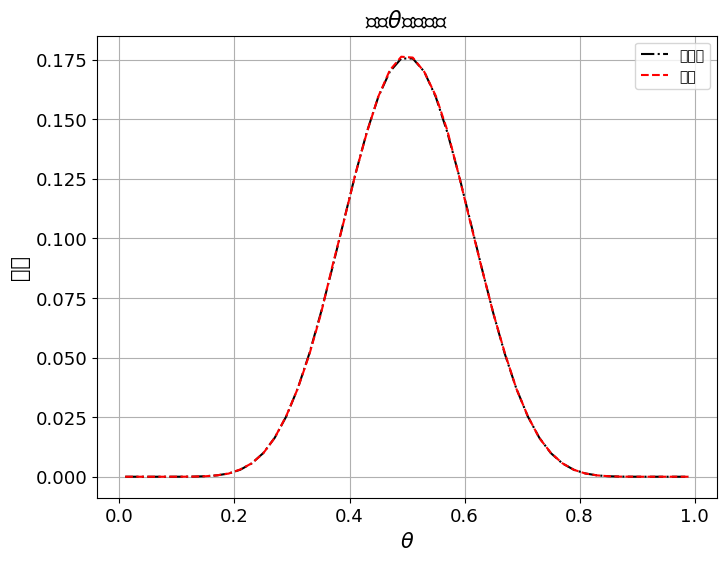

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(thetas, P, 'k-.', label='理论值')
ax.plot(thetas, f_kI, 'r--', label='分数')
plt.title(r'不同$\theta$值的比较', fontsize=16)
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel('分数', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()

**不同 $n$ 值的比较**

现在我们固定 $\theta=0.7, k=10, I=1,000,000$ 并将 $n$ 从 $1$ 变化到 $100$。

然后我们将绘制结果。

In [7]:
n_low, n_high, nn = 1, 100, 50
ns = np.linspace(n_low, n_high, nn, dtype='int')
P = []
f_kI = []
for i in range(nn):
    freq = frequentist(θ, ns[i], I)
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u4e0d' [U+4e0d], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540c' [U+540c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6bd4' [U+6bd4], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8f83' [U+8f83], substituting with a dummy symbol.


/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27966 (\N{CJK UNIFIED IDEOGRAPH-6D3E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u4e0d' [U+4e0d], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540c' [U+540c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6bd4' [U+6bd4], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8f83' [U+8f83], substituting with a dummy symbol.


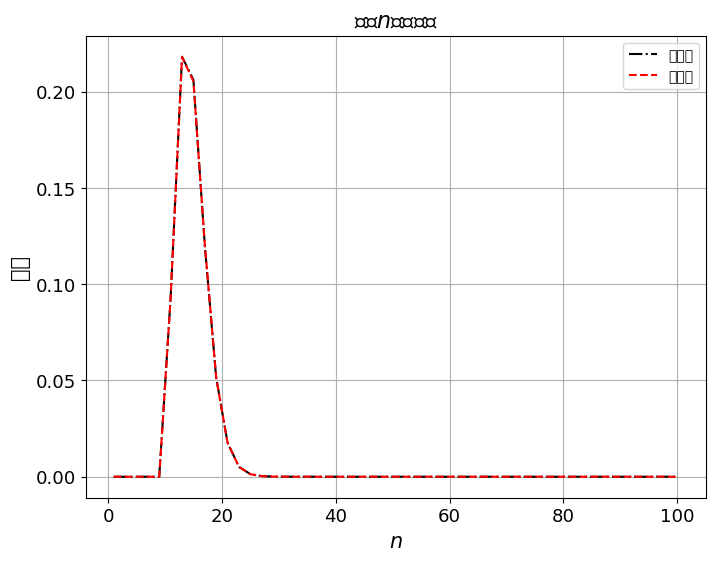

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(ns, P, 'k-.', label='理论值')
ax.plot(ns, f_kI, 'r--', label='频率派')
plt.title(r'不同$n$值的比较', fontsize=16)
plt.xlabel(r'$n$', fontsize=15)
plt.ylabel('比例', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()

**不同 $I$ 值的比较**

现在我们固定 $\theta=0.7, n=20, k=10$，并将 $\log(I)$ 从 $2$ 变化到 $7$。

In [9]:
I_log_low, I_log_high, nI = 2, 6, 200
log_Is = np.linspace(I_log_low, I_log_high, nI)
Is = np.power(10, log_Is).astype(int)
P = []
f_kI = []
for i in range(nI):
    freq = frequentist(θ, n, Is[i])
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

Font 'default' does not have a glyph for '\u4e0d' [U+4e0d], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540c' [U+540c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6bd4' [U+6bd4], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8f83' [U+8f83], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4e0d' [U+4e0d], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540c' [U+540c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6bd4' [U+6bd4], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8f83' [U+8f83], substituting with a dummy symbol.


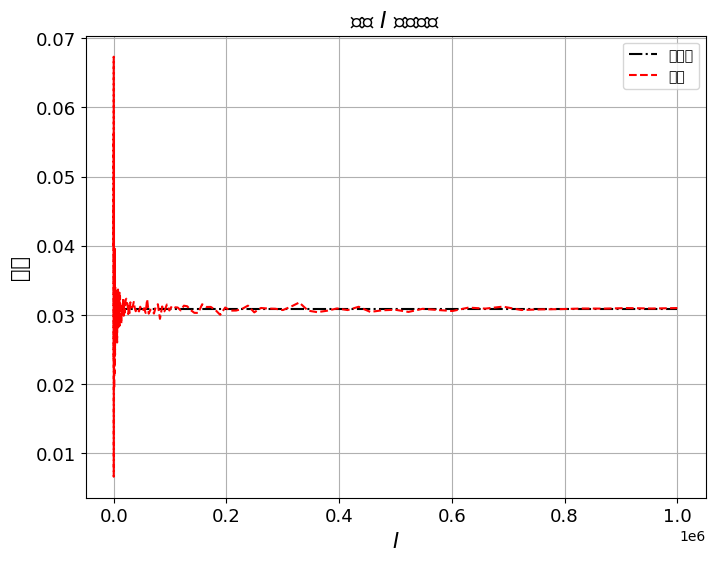

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(Is, P, 'k-.', label='理论值')
ax.plot(Is, f_kI, 'r--', label='分数')
plt.title(r'不同 $I$ 值的比较', fontsize=16)
plt.xlabel(r'$I$', fontsize=15)
plt.ylabel('分数', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()

从上面的图表中，我们可以看到**$I$，即独立序列的数量，**起着重要作用。

当$I$变大时，理论概率和频率估计之间的差异变小。

而且，只要$I$足够大，改变$\theta$或$n$都不会实质性地改变观察到的分数作为$\theta$的近似值的准确性。

这里体现了大数定律。

对于每个独立序列的抽取，$\textrm{Prob}(X_i =  k | \theta)$都是相同的，所以所有抽取的聚合形成了一个二元随机变量$\rho_{k,i},i=1,2,...I$的独立同分布序列，其均值为$\textrm{Prob}(X =  k | \theta)$，方差为

$$
n \cdot \textrm{Prob}(X =  k | \theta) \cdot (1-\textrm{Prob}(X =  k | \theta)).
$$

因此，根据大数定律，$P_{k,i}$的平均值收敛于：

$$
E[\rho_{k,i}] = \textrm{Prob}(X =  k | \theta) = \left(\frac{n!}{k! (n-k)!} \right) \theta^k (1-\theta)^{n-k}
$$

当$I$趋向于无穷时。

## 贝叶斯解释

我们再次使用二项分布。

但现在我们不把$\theta$看作是一个固定的数。

相反，我们把它看作是一个**随机变量**。

$\theta$由一个概率分布来描述。

但现在这个概率分布的含义与我们在大规模独立同分布样本中能预期出现的相对频率不同。

相反，$\theta$的概率分布现在是我们对$\theta$可能值的看法的总结，这些看法要么是

* 在我们**完全没有看到**任何数据之前，或者
* 在我们已经看到**一些**数据之后，但在看到**更多**数据之前

因此，假设在看到任何数据之前，你有一个个人先验概率分布，表示为

$$
P(\theta) = \frac{\theta^{\alpha-1}(1-\theta)^{\beta -1}}{B(\alpha, \beta)}
$$

其中$B(\alpha, \beta)$是一个**贝塔函数**，所以$P(\theta)$是一个带参数$\alpha, \beta$的**贝塔分布**。

```{exercise}
:label: pm_ex2

**a)** 请写出从参数为$\theta$的二项分布中抽取长度为$n$的样本的**似然函数**。

**b)** 请写出观察到一次硬币翻转后$\theta$的**后验**分布。

**c)** 现在假设$\theta$的真实值为$.4$，而某个不知道这一点的人有一个参数为$\beta = \alpha = .5$的贝塔先验分布。请编写一个Python类来模拟这个人对于一个长度为$n$的_单个_序列的$\theta$的个人后验分布。

**d)** 请绘制当$n$增长为$1, 2, \ldots$时，$\theta$的后验分布关于$\theta$的函数图。

**e)** 对于不同的$n$值，请描述并计算区间$[.45, .55]$的贝叶斯覆盖区间。

**f)** 请说明贝叶斯覆盖区间回答了什么问题。

**g)** 请计算对于不同的样本大小$n$，后验概率$P(\theta \in [.45, .55])$的值。

**h)** 请使用您的Python类来研究当 $n \rightarrow + \infty$ 时后验分布会发生什么变化，同样假设 $\theta$ 的真实值为 $.4$，尽管对于通过贝叶斯定律进行更新的人来说这是未知的。
```

```{solution-start} pm_ex2
:class: dropdown
```

**a)** 请写出观察到一次硬币翻转后 $\theta$ 的**似然函数**和**后验**分布。

假设结果为 __Y__。

似然函数为：

$$
L(Y|\theta)= \textrm{Prob}(X =  Y | \theta) =
\theta^Y (1-\theta)^{1-Y}
$$

**b)** 请写出观察到一次硬币翻转后 $\theta$ 的**后验**分布。

先验分布为：

$$
\textrm{Prob}(\theta) = \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
$$

我们可以通过以下方式推导 $\theta$ 的后验分布：

\begin{align*}
  \textrm{Prob}(\theta | Y) &= \frac{\textrm{Prob}(Y | \theta) \textrm{Prob}(\theta)}{\textrm{Prob}(Y)} \\
  &=\frac{\textrm{Prob}(Y | \theta) \textrm{Prob}(\theta)}{\int_{0}^{1} \textrm{Prob}(Y | \theta) \textrm{Prob}(\theta) d \theta }\\
  &= \frac{\theta^Y (1-\theta)^{1-Y}\frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}}{\int_{0}^{1}\theta^Y (1-\theta)^{1-Y}\frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)} d \theta } \\
  &= \frac{ \theta^{Y+\alpha - 1} (1 - \theta)^{1-Y+\beta - 1}}{\int_{0}^{1}\theta^{Y+\alpha - 1} (1 - \theta)^{1-Y+\beta - 1} d \theta}
\end{align*}

这意味着

$$
\textrm{Prob}(\theta | Y) \sim \textrm{Beta}(\alpha + Y, \beta + (1-Y))
$$

现在假设 $\theta$ 的真实值为 $.4$，并且有一个不知道这一点的人，他有一个 $\beta = \alpha = .5$ 的beta先验分布。

**c)** 现在假设 $\theta$ 的真实值为 $.4$，并且有一个不知道这一点的人，他有一个参数为 $\beta = \alpha = .5$ 的beta先验分布。请编写一个Python类来模拟这个人对于_单个_长度为 $n$ 的序列的 $\theta$ 的个人后验分布。

In [11]:
class Bayesian:

    def __init__(self, θ=0.4, n=1_000_000, α=0.5, β=0.5):
        """
        参数:
        ----------
        θ : float, 范围在 [0,1] 之间。
           一次硬币投掷得到正面（Y = 1）的概率

        n : int.
           独立序列中独立投掷的次数

        α&β : int 或 float.
             θ 的先验分布的参数

        """
        self.θ, self.n, self.α, self.β = θ, n, α, β
        self.prior = st.beta(α, β)

    def draw(self):
        """
        模拟一个长度为 n 的单个序列，给定概率 θ

        """
        array = np.random.rand(self.n)
        self.draws = (array < self.θ).astype(int)

    def form_single_posterior(self, step_num):
        """
        在观察到序列的前 step_num 个元素后形成后验分布

        参数
        ----------
        step_num: int.
               用于形成后验分布的观察步数

        返回
        ------
        后验分布，用于后续步骤的绘图

        """
        heads_num = self.draws[:step_num].sum()
        tails_num = step_num - heads_num

        return st.beta(self.α+heads_num, self.β+tails_num)

    def form_posterior_series(self,num_obs_list):
        """
        形成一系列后验分布，这些分布是在观察不同数量的抽样后形成的。

        参数
        ----------
        num_obs_list: int 列表。
               用于形成一系列后验分布的观察数量列表。

        """
        self.posterior_list = []
        for num in num_obs_list:
            self.posterior_list.append(self.form_single_posterior(num))

**d)** 请绘制$\theta$的后验分布随着$n$从$1, 2, \ldots$增长时的函数图。

/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packa

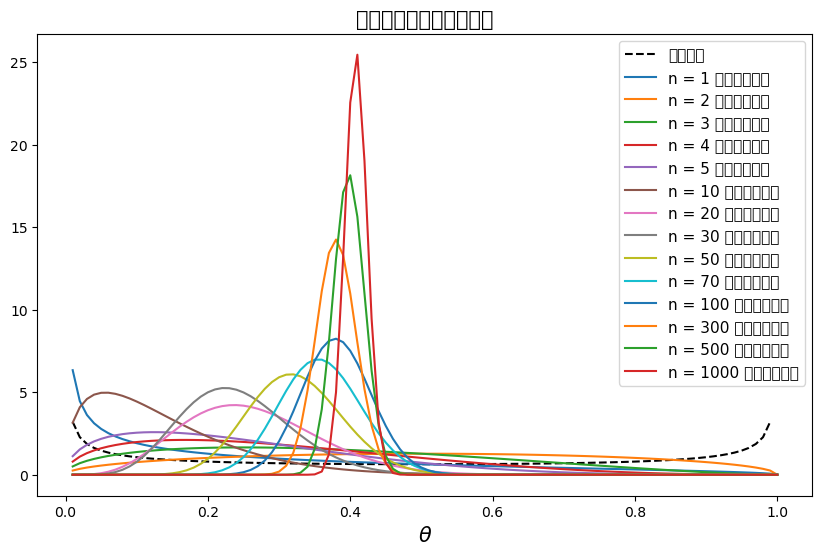

In [12]:
Bay_stat = Bayesian()
Bay_stat.draw()

num_list = [1, 2, 3, 4, 5, 10, 20, 30, 50, 70, 100, 300, 500, 1000, # 此行用于有限n
            5000, 10_000, 50_000, 100_000, 200_000, 300_000]  # 此行用于近似无穷n

Bay_stat.form_posterior_series(num_list)

θ_values = np.linspace(0.01, 1, 100)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(θ_values, Bay_stat.prior.pdf(θ_values), label='先验分布', color='k', linestyle='--')

for ii, num in enumerate(num_list[:14]):
    ax.plot(θ_values, Bay_stat.posterior_list[ii].pdf(θ_values), label='n = %d 时的后验分布' % num)

ax.set_title('后验分布的概率密度函数', fontsize=15)
ax.set_xlabel(r"$\theta$", fontsize=15)

ax.legend(fontsize=11)
plt.show()

**e)** 对于不同的 $n$ 值，请描述并计算后验概率的 $.05$ 和 $.95$ 分位数。

In [13]:
upper_bound = [ii.ppf(0.05) for ii in Bay_stat.posterior_list[:14]]
lower_bound = [ii.ppf(0.95) for ii in Bay_stat.posterior_list[:14]]

interval_df = pd.DataFrame()
interval_df['upper'] = upper_bound
interval_df['lower'] = lower_bound
interval_df.index = num_list[:14]
interval_df = interval_df.T
interval_df

,1,2,3,4,5,10,20,30,50,70,100,300,500,1000
upper,0.001543,0.097308,0.062413,0.046007,0.036447,0.017892,0.121508,0.127460,0.220799,0.268394,0.303401,0.334893,0.362493,0.382656
lower,0.771480,0.902692,0.764466,0.650707,0.562845,0.330563,0.428620,0.375605,0.434206,0.454460,0.461664,0.426809,0.434377,0.433737


随着$n$的增加，我们可以看到贝叶斯覆盖区间变窄并趋向于$0.4$。

**f)** 请说明贝叶斯覆盖区间回答了什么问题。

贝叶斯覆盖区间表示后验分布的累积概率分布(CDF)中[$p_1$, $p_2$]分位数对应的$\theta$的范围。

要构建覆盖区间，我们首先计算未知参数$\theta$的后验分布。

如果CDF为$F(\theta)$，那么区间$[p_1,p_2]$的贝叶斯覆盖区间$[a,b]$由以下等式描述：

$$
F(a)=p_1,F(b)=p_2
$$

**g)** 请计算不同样本量$n$下$\theta \in [.45, .55]$的后验概率。

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u9a8c' [U+9a8c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6982' [U+6982], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u7387' [U+7387], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8303' [U+8303], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u56f4' [U+56f4], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4ece' [U+4ece], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5230' [U+5230], substituting with a dummy symbol.


/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35266 (\N{CJK UNIFIED IDEOGRAPH-89C2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u540e' [U+540e], subs

Font 'default' does not have a glyph for '\u9a8c' [U+9a8c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6982' [U+6982], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u7387' [U+7387], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u8303' [U+8303], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u56f4' [U+56f4], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4ece' [U+4ece], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u5230' [U+5230], substituting with a dummy symbol.


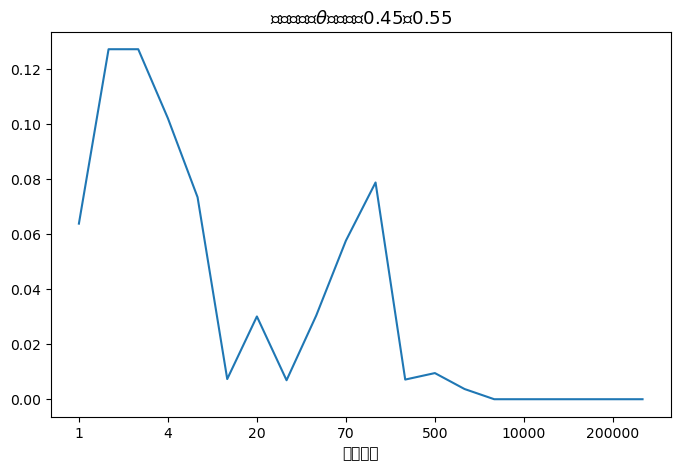

In [14]:
left_value, right_value = 0.45, 0.55

posterior_prob_list=[ii.cdf(right_value)-ii.cdf(left_value) for ii in Bay_stat.posterior_list]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(posterior_prob_list)
ax.set_title('后验概率：'+ r"$\theta$" +'的范围从%.2f到%.2f'%(left_value, right_value),
             fontsize=13)
ax.set_xticks(np.arange(0, len(posterior_prob_list), 3))
ax.set_xticklabels(num_list[::3])
ax.set_xlabel('观测数量', fontsize=11)

plt.show()

注意在上图中，当 $n$ 增加时，$\theta \in [.45, .55]$ 的后验概率通常呈现出驼峰形状。

这里有两种相互对立的力量在起作用。

第一种力量是，个体在观察到新的结果时会调整他的信念，使他的后验概率分布变得越来越符合实际，这解释了后验概率的上升。

然而，$[.45, .55]$ 实际上排除了生成数据的真实 $\theta =.4$。

因此，随着更大的样本量使他的 $\theta$ 后验概率分布变得更加精确，后验概率开始下降。

下降看起来如此陡峭，仅仅是因为图表的尺度使得观测数量增加不成比例。

当观测数量变得足够大时，我们的贝叶斯学习者对 $\theta$ 变得如此确信，以至于他认为 $\theta \in [.45, .55]$ 的可能性非常小。

这就是为什么当观测数量超过500时，我们看到一条几乎水平的线。

**h)** 请使用你的Python类来研究当 $n \rightarrow + \infty$ 时后验分布会发生什么，同样假设 $\theta = .4$ 是真实值，尽管对于通过贝叶斯法则进行更新的人来说这是未知的。

使用我们上面创建的Python类，我们可以看到后验分布随着 $n$ 趋向于无穷大时的演变。

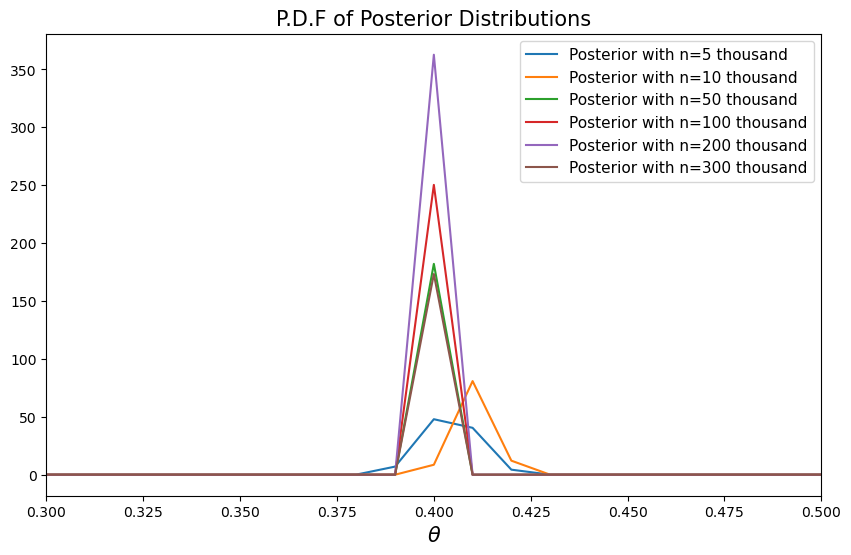

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

for ii, num in enumerate(num_list[14:]):
    ii += 14
    ax.plot(θ_values, Bay_stat.posterior_list[ii].pdf(θ_values),
            label='Posterior with n=%d thousand' % (num/1000))

ax.set_title('P.D.F of Posterior Distributions', fontsize=15)
ax.set_xlabel(r"$\theta$", fontsize=15)
ax.set_xlim(0.3, 0.5)

ax.legend(fontsize=11)
plt.show()

随着 $n$ 的增加，我们可以看到概率密度函数在 $0.4$（即 $\theta$ 的真实值）处_集中_。

这里后验均值收敛于 $0.4$，而后验标准差从上方收敛于 $0$。

为了展示这一点，我们计算后验分布的均值和方差统计量。

/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packa

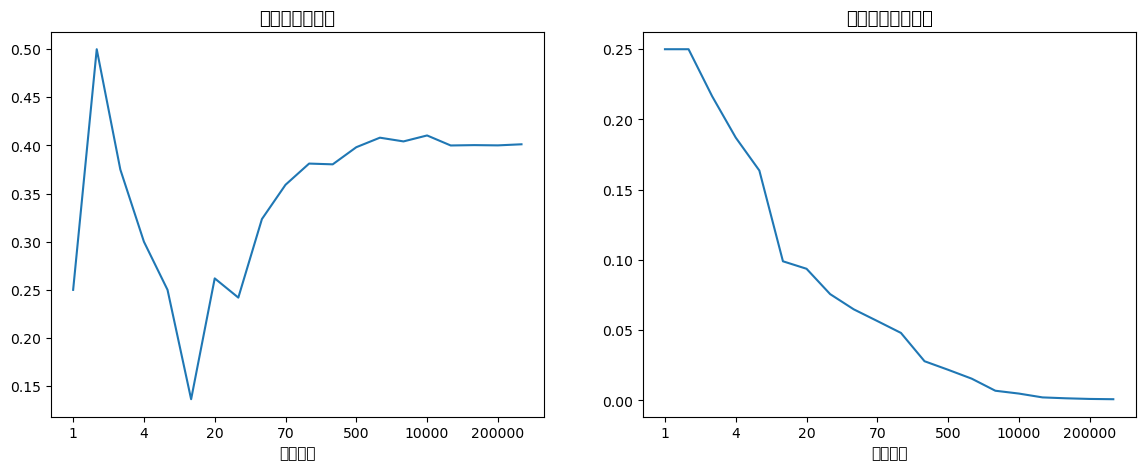

In [16]:
mean_list = [ii.mean() for ii in Bay_stat.posterior_list]
std_list = [ii.std() for ii in Bay_stat.posterior_list]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(mean_list)
ax[0].set_title('后验分布的均值', fontsize=13)
ax[0].set_xticks(np.arange(0, len(mean_list), 3))
ax[0].set_xticklabels(num_list[::3])
ax[0].set_xlabel('观测数量', fontsize=11)

ax[1].plot(std_list)
ax[1].set_title('后验分布的标准差', fontsize=13)
ax[1].set_xticks(np.arange(0, len(std_list), 3))
ax[1].set_xticklabels(num_list[::3])
ax[1].set_xlabel('观测数量', fontsize=11)

plt.show()

```{solution-end}
```

我们应该如何解读上述模式？

答案就在贝叶斯更新公式中。

将单步贝叶斯更新自然延伸到 n 步贝叶斯更新是很合理的。

$$
\textrm{Prob}(\theta|k) = \frac{\textrm{Prob}(\theta,k)}{\textrm{Prob}(k)}=\frac{\textrm{Prob}(k|\theta)*\textrm{Prob}(\theta)}{\textrm{Prob}(k)}=\frac{\textrm{Prob}(k|\theta)*\textrm{Prob}(\theta)}{\int_0^1 \textrm{Prob}(k|\theta)*\textrm{Prob}(\theta) d\theta}
$$

$$
=\frac{{N \choose k} (1 - \theta)^{N-k} \theta^k*\frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}}{\int_0^1 {N \choose k} (1 - \theta)^{N-k} \theta^k*\frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)} d\theta}
$$

$$
=\frac{(1 -\theta)^{\beta+N-k-1}* \theta^{\alpha+k-1}}{\int_0^1 (1 - \theta)^{\beta+N-k-1}* \theta^{\alpha+k-1} d\theta}
$$

$$
={Beta}(\alpha + k, \beta+N-k)
$$

具有 $\alpha$ 和 $\beta$ 参数的贝塔分布有以下均值和方差。

均值是 $\frac{\alpha}{\alpha + \beta}$

方差是 $\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

* $\alpha$ 可以视为成功次数

* $\beta$ 可以视为失败次数

随机变量 $k$ 和 $N-k$ 服从参数为 $\theta=0.4$ 的二项分布。

这就是真实的数据生成过程。

根据大数定律，对于大量观测值，观测到的频率 $k$ 和 $N-k$ 将由真实的数据生成过程来描述，即我们在计算机上生成观测值时假设的总体概率分布。（参见 {ref}`pm_ex1`）。

因此，后验分布的均值收敛于 $0.4$，且方差趋近于零。

/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packa

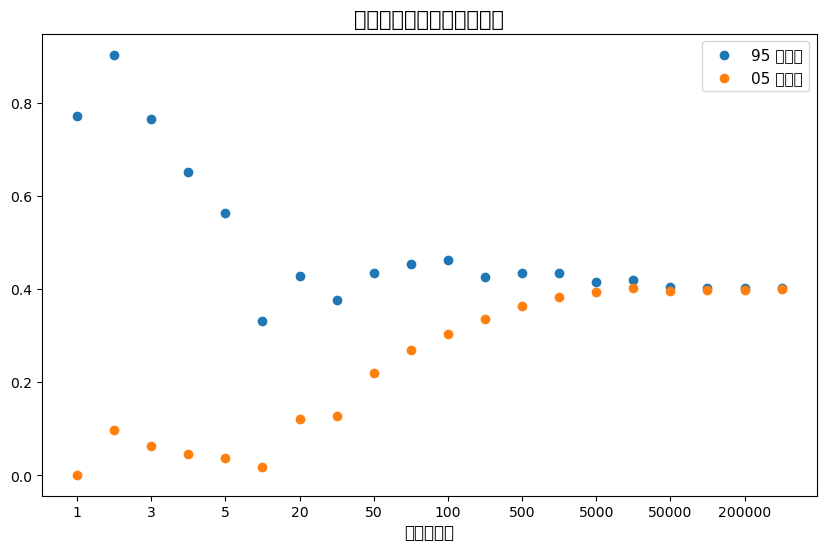

In [17]:
upper_bound = [ii.ppf(0.95) for ii in Bay_stat.posterior_list]
lower_bound = [ii.ppf(0.05) for ii in Bay_stat.posterior_list]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.arange(len(upper_bound)), upper_bound, label='95 分位数')
ax.scatter(np.arange(len(lower_bound)), lower_bound, label='05 分位数')

ax.set_xticks(np.arange(0, len(upper_bound), 2))
ax.set_xticklabels(num_list[::2])
ax.set_xlabel('观测值数量', fontsize=12)
ax.set_title('后验分布的贝叶斯覆盖区间', fontsize=15)

ax.legend(fontsize=11)
plt.show()

在观察了大量结果后，后验分布收敛在$0.4$周围。

因此，贝叶斯统计学家认为$\theta$接近$.4$。

如上图所示，随着观测数量的增加，贝叶斯置信区间(BCIs)在$0.4$周围变得越来越窄。

然而，如果仔细观察，你会发现BCIs的中心并不完全是$0.4$，这是由于先验分布的持续影响和模拟路径的随机性造成的。

## 共轭先验的作用

我们做出了一些假设，将似然函数和先验的函数形式联系起来，这大大简化了我们的计算。

特别是，我们假设似然函数是**二项分布**，而先验分布是**beta分布**，这导致贝叶斯定律推导出的后验分布也是**beta分布**。

所以后验和先验都是beta分布，只是它们的参数不同。

当似然函数和先验像手和手套一样完美匹配时，我们可以说先验和后验是**共轭分布**。

在这种情况下，我们有时也说我们有似然函数$\textrm{Prob}(X | \theta)$的**共轭先验**。

通常，似然函数的函数形式决定了**共轭先验**的函数形式。


一个自然的问题是，为什么一个人对参数$\theta$的个人先验必须局限于共轭先验的形式？

为什么不能是其他更真实地描述个人信念的函数形式？

从争辩的角度来说，人们可以问，为什么似然函数的形式应该对我关于$\theta$的个人信念有*任何*影响？

对这个问题的一个得体回答是，确实不应该有影响，但如果你想要轻松地计算后验分布，使用与似然函数共轭的先验会让你更愉快。

否则，你的后验分布将不会有一个方便的解析形式，你就会需要使用{doc}`这个 quantecon 讲座 <bayes_nonconj>`中部署的马尔可夫链蒙特卡洛技术。

我们也在{doc}`这个 quantecon 讲座 <ar1_bayes>`和{doc}`这个 quantecon 讲座 <ar1_turningpts>`中应用这些强大的方法来近似非共轭先验的贝叶斯后验分布。